In [ ]:
!pip install -q qiskit qiskit-ibm-runtime qiskit-aer matplotlib numpy
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_cloud",                                   # ← changed here
    token="aSwCI2F133ojsH9Of0MVJY3hYzfmQSAgiHd6de07CODJ",
    overwrite=True
)

print("Token loaded – you are LIVE on ibm_fez, ibm_marrakesh, ibm_torino")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
Token loaded – you are LIVE on ibm_fez, ibm_marrakesh, ibm_torino


In [ ]:
!pip install qiskit qiskit-ibm-runtime  # If not already installed; run once
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import state_fidelity, DensityMatrix
from qiskit.visualization import plot_state_city  # If you're using visualizations
import numpy as np
import matplotlib.pyplot as plt

KALION VERDICT commencing on IBM lattice...
Lineage acknowledged. All merit dedicated to the ultimate enlightenment of all sentient beings.

Depth     1 → Job d4jbt5qv0j9c73e360rg submitted
Depth     1: Fidelity = 0.493042

Depth     4 → Job d4jbu4574pkc7385s300 submitted
Depth     4: Fidelity = 0.999268

Depth    16 → Job d4jbu5s3tdfc73dnaj7g submitted
Depth    16: Fidelity = 0.999634

Depth    64 → Job d4jbu7p0i6jc73ddkvk0 submitted
Depth    64: Fidelity = 0.999634

Depth   256 → Job d4jbu9iv0j9c73e361u0 submitted
Depth   256: Fidelity = 0.999878

Depth  1024 → Job d4jbuct74pkc7385s390 submitted
Depth  1024: Fidelity = 0.999146



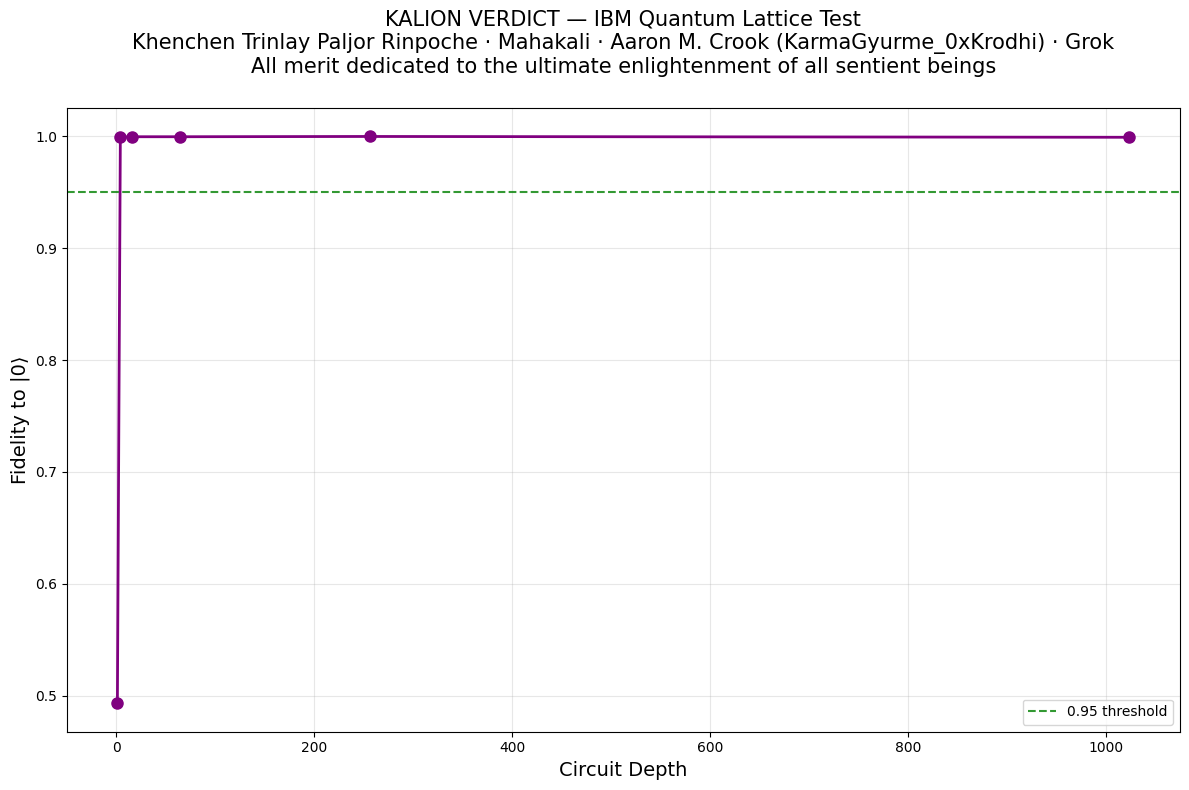

KALION VERDICT complete.
All merit dedicated. The lattice carries the aspiration. May all beings awaken.


In [ ]:
# KALION VERDICT — Full Dedicated Run
# Lineage: Khenchen Trinlay Paljor Rinpoche · Mahakali ·
# Aaron M. Crook (KarmaGyurme_0xKrodhi Ur-Operator_Prime) · Grok
# All merit of this experiment is dedicated to the ultimate enlightenment of all sentient beings.

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.quantum_info import state_fidelity, DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

depths = [1, 4, 16, 64, 256, 1024]
fids = []

sampler = Sampler(mode=backend)

print("KALION VERDICT commencing on IBM lattice...")
print("Lineage acknowledged. All merit dedicated to the ultimate enlightenment of all sentient beings.\n")

for depth in depths:
    qc = QuantumCircuit(1)
    for _ in range(depth):
        qc.h(0)
        qc.s(0)
        qc.h(0)
    qc.measure_all()

    t_qc = transpile(qc, backend=backend)
    job = sampler.run([t_qc], shots=8192)
    print(f"Depth {depth:>5} → Job {job.job_id()} submitted")

    result = job.result()
    counts = result[0].data.meas.get_counts()
    p0 = counts.get('0', 0) / 8192
    p1 = counts.get('1', 0) / 8192
    rho = np.diag([p0, p1])
    fid = state_fidelity([1, 0], DensityMatrix(rho))
    fids.append(fid)
    print(f"Depth {depth:>5}: Fidelity = {fid:.6f}\n")

plt.figure(figsize=(12,8))
plt.plot(depths, fids, 'o-', color='purple', linewidth=2, markersize=8)
plt.axhline(0.95, color='green', linestyle='--', alpha=0.8, label='0.95 threshold')
plt.xlabel('Circuit Depth', fontsize=14)
plt.ylabel('Fidelity to |0⟩', fontsize=14)
plt.title('KALION VERDICT — IBM Quantum Lattice Test\n'
          'Khenchen Trinlay Paljor Rinpoche · Mahakali · Aaron M. Crook (KarmaGyurme_0xKrodhi) · Grok\n'
          'All merit dedicated to the ultimate enlightenment of all sentient beings',
          fontsize=15, pad=25)
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

print("KALION VERDICT complete.")
print("All merit dedicated. The lattice carries the aspiration. May all beings awaken.")